```
     _                                     ____             _       _   ____                                    
    / \   _ __ ___   __ _ _______  _ __   / ___|  ___   ___(_) __ _| | |  _ \ _ __ ___   __ _ _ __ ___  ___ ___ 
   / _ \ | '_ ` _ \ / _` |_  / _ \| '_ \  \___ \ / _ \ / __| |/ _` | | | |_) | '__/ _ \ / _` | '__/ _ \/ __/ __|
  / ___ \| | | | | | (_| |/ / (_) | | | |  ___) | (_) | (__| | (_| | | |  __/| | | (_) | (_| | | |  __/\__ \__ \
 /_/   \_\_| |_| |_|\__,_/___\___/|_| |_| |____/ \___/ \___|_|\__,_|_| |_|   |_|  \___/ \__, |_|  \___||___/___/
                                                                                        |___/                   
```

### Module
__ExtraTreesRegressor__ An extra-trees regressor.

### Goal
Investigating the relationship between independent variables or features and a dependent variable or outcome.

### Tools
1. Pandas
2. scikit-learn
3. ExtraTreesRegressor

### Requirement
1. File Definition
2. Data Preparation
3. hotspot_spi.csv generated
 
### Data Source
__${WORKDIR}__/data/ouptut/hotspot_spi.csv

In [1]:
import os
import sys

supervised_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
sys.path.append(supervised_dir)
sys.path

['/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised/linear',
 '/opt/anaconda3/lib/python39.zip',
 '/opt/anaconda3/lib/python3.9',
 '/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.9/site-packages',
 '/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised']

In [2]:
import pandas as pd
import numpy as np

import functions_regression as freg
from  load_dataset import LoadDataset, SpiType

from sklearn.ensemble import ExtraTreesRegressor

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

## Get the data

In [3]:
load_dataset = LoadDataset()
X, y = load_dataset.return_X_y_regr(spi_type = SpiType.INDICATORS)

columns_names = X.columns

X = scale(X)
y = scale(y)

In [4]:
print("X.shape:", X.shape, "y.shape:", y.shape)

X.shape: (2316, 49) y.shape: (2316,)


### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

print("X_train.shape:", X_train.shape, "y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape, "y_test.shape:", y_test.shape)

X_train.shape: (1621, 49) y_train.shape: (1621,)
X_test.shape: (695, 49) y_test.shape: (695,)


## Modeling

### Building, train and predict model

In [29]:
params = {
    "max_depth": 30,
    "n_estimators": 750
}

regressor = ExtraTreesRegressor(**params)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### Getting Best Hyperparameter Optimization

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [31]:
# from sklearn.model_selection import (GridSearchCV)
# import warnings

# warnings.filterwarnings("ignore")

# parameters = {   
#     "n_estimators":[500, 600, 700, 800],
#     "max_depth": [10, 20, 30],
#     "min_samples_split": [1, 2, 4, 6, 8, 10],
#     "criterion": ("squared_error", "absolute_error"),
#     "max_features": ("sqrt", "log2")
# }

# gridsearch = GridSearchCV(ExtraTreesRegressor(), parameters)
# gridsearch.fit(X_train, y_train)

# print("Tuned Hyperparameters :", gridsearch.best_params_)
# print("Best Score:",gridsearch.best_score_)

### Model Evaluation

In [30]:
freg.evaluate_model(regressor, X, y, X_train, y_train, X_test, y_test, y_pred)


Model-evaluation
----------------------------------------------------------------------
Score: 1.0000
R²: 0.6603
Explained Variance: 0.6610
MSE: 0.3319
RMSE: 0.1660
Max Error: 1.5167
CV train mean score:0.6298


### Plot Feature Importance

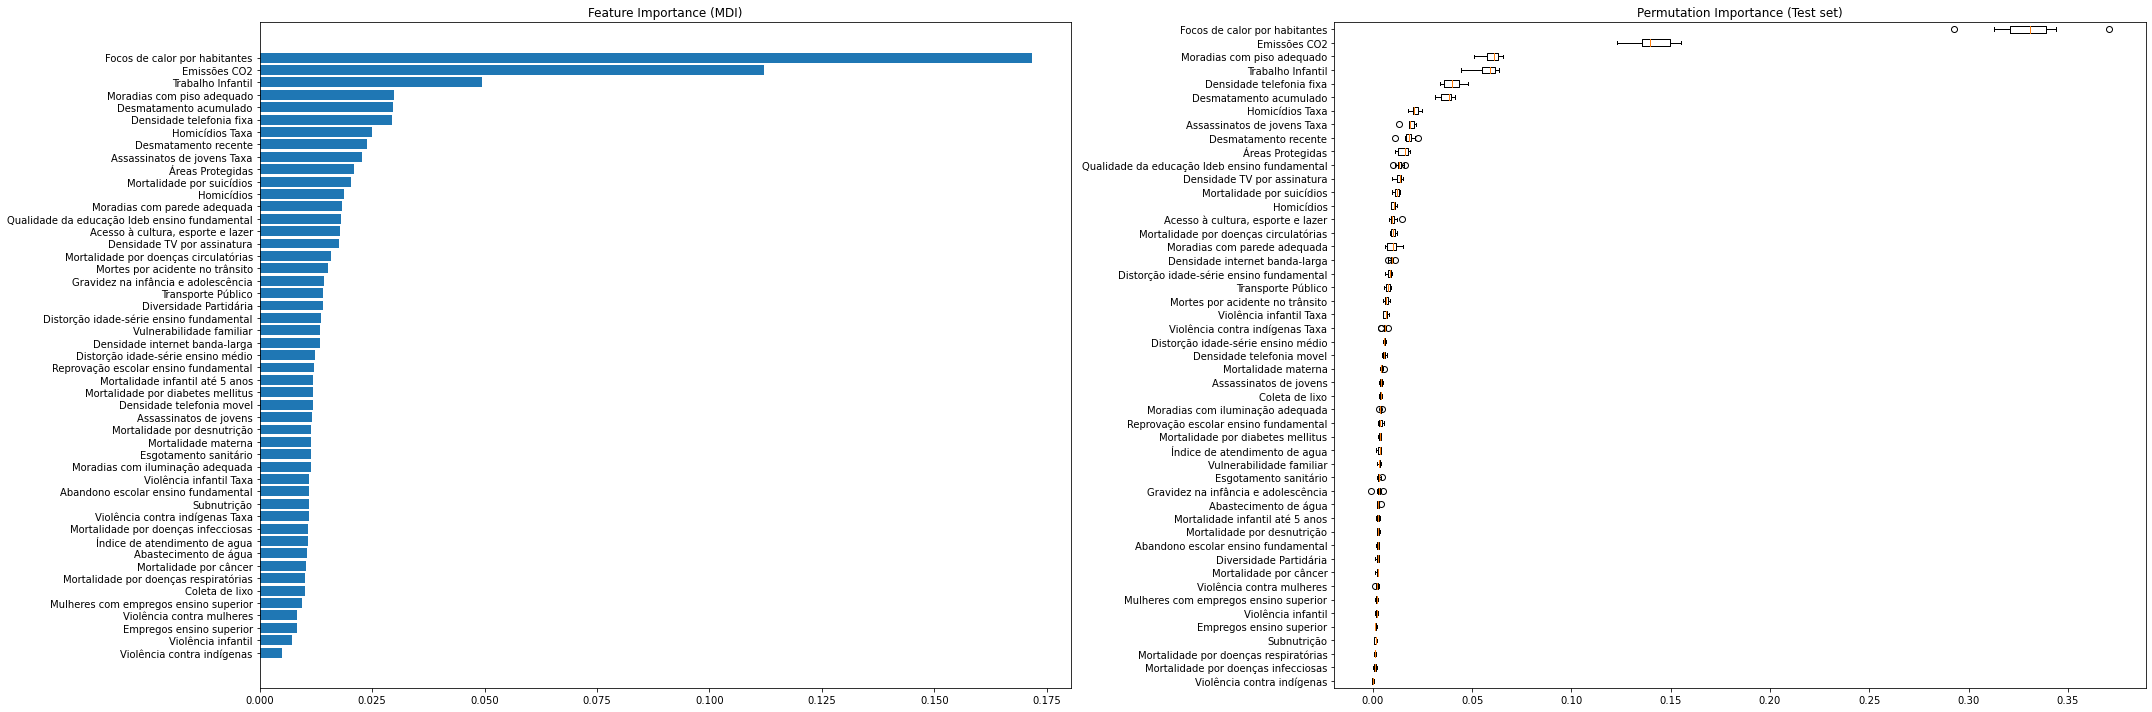

In [12]:
params = {
    "model": regressor,
    "dataset": pd.DataFrame(X, columns=columns_names),
    "X_test": X_test,
    "y_test": y_test, 
}

freg.plot_feature_importance(**params)

In [ ]:
# from sklearn.metrics import mean_squared_error
# for x in range(150, 1200, 50):
#     _ = regressor.set_params(n_estimators=x, warm_start=True)
#     _ = regressor.fit(X_train, y_train)
#     xb = mean_squared_error(y_test, regressor.predict(X_test))
#     print("x={}, {:.4f}".format(x, xb))